In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/NCKH Depression/Dataset'
!ls

/content/drive/MyDrive/NCKH Depression/Dataset
'Education test.xlsx'   Family.xlsx	  Love.xlsx	   'Working test.xlsx'
 Education.xlsx         Intro.xlsx	 'Self test.xlsx'   Working.xlsx
'Family test.xlsx'     'Love test.xlsx'   Self.xlsx


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Step 1: Import, preprocess.

In [ ]:
data = pd.read_excel('Love.xlsx')
data.head()

,Họ và tên bạn là gì?,Ngày sinh của bạn là?,Hiện tại bạn là?,Giới tính sinh học của bạn là:,Bạn có thuộc cộng đồng LGBT không?,1. Bạn là người có xu hướng:,2. Bạn có cảm thấy bản thân mình thừa thãi không?,"3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?",4. Bạn đang tự ti?,"5. Bạn có hay vận động thể dục, thể thao không?",...,"1. Bạn đột nhiên ăn quá nhiều hoặc chán ăn, biếng ăn?","2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?","3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?","4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?",5. Bạn không thể tập trung khi làm việc?,"6. Bạn mất tự tin vào bản thân, thất vọng về bản thân và cả gia đình?","7. Bạn luôn cảm thấy chán nản, kiệt sức, tuyệt vọng?",8. Bạn ít thấy hứng thú hoặc không tìm thấy niềm vui trong mọi việc?,"9. Bạn có suy nghĩ tiêu cực, muốn làm tổn thương bản thân thậm chí có suy nghĩ tự sát?",Tổng điểm
0,Trần Triệu Như,2003-11-04,Sinh viên năm 1,Nữ,Không,Vừa hướng nội vừa hướng ngoại,Không,Một chút,Một chút,Không,...,3.0,2.0,3.0,1.0,0.0,1.0,1.0,1.0,0.0,12.0
1,Trần Trường Hải,2002-04-13,Sinh viên năm 2,Nam,Không,Hướng nội,Không,Một chút,Có,Có,...,1.0,3.0,3.0,1.0,2.0,2.0,3.0,3.0,1.0,19.0
2,Nguyen Quang Dieu,2002-05-30,Sinh viên năm 2,Nam,Không,Vừa hướng nội vừa hướng ngoại,Một chút,Một chút,Không,Một chút,...,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,6.0
3,Trương Minh Lộc,2002-09-20,Sinh viên năm 2,Nam,Không,Vừa hướng nội vừa hướng ngoại,Một chút,Có,Có,Không,...,3.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,0.0,16.0
4,Nguyễn Hải Ngọc,2003-12-09,Sinh viên năm 1,Nữ,Không,Chưa xác định được,Không,Một chút,Một chút,Một chút,...,1.0,2.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,10.0


In [ ]:
data.columns = ['Name', 'DoB', 'Job', 'Sex', 'LGBT', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 
                'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15',
                'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'Total']

$Data$ $Preprocessing$

In [ ]:
# Change values in total column to the rate of depression. Normal - Minimal - Mild - Medium - Severe.
data.Total = data.Total.replace({1: 0, 2: 0, 3: 0, 4: 0,
                                 5: 1, 6: 1, 7: 1, 8: 1, 9: 1,
                                 10: 2, 11: 2, 12: 2, 13: 2, 14: 2,
                                 15: 3, 16: 3, 17: 3, 18: 3, 19: 3,
                                 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4})


# Change values in job column from Sinh vien trung cap to Trung cap nghe
data.Job = data.Job.replace({'Học sinh cấp 3': 0,
                             'Sinh viên trung cấp': 1,
                             'Sinh viên năm 1': 2,
                             'Sinh viên năm 2': 3,
                             'Sinh viên năm 3': 4,
                             'Sinh viên năm 4': 5,
                             'Sinh viên từ năm 4 trở lên': 6,
                             'Đã tốt nghiệp.': 7})
data.LGBT = data.LGBT.replace({'Có': 1,
                               'Không': 0,
                               'Chưa xác định': 0.5})
data.a1 = data.a1.replace({'Hướng ngoại': 1,
                     'Hướng nội': 2,
                     'Chưa xác định được': 0,
                     'Vừa hướng nội vừa hướng ngoại': 1.5})
data.a2 = data.a2.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
data.a3 = data.a3.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
data.a4 = data.a4.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})

# Question (B)
data.b15 = data.b15.replace({'Chưa từng': 0, 'Một - hai lần': 1, 'Khoảng năm lần': 2, 'Khoảng 10 lần': 3, 'Rất nhiều': 4, 'Mỗi ngày': 5})

# Drop the column Name
data = data.drop(columns=[ 'Name', 'DoB','a7', 'a8','a1','a2','a3','a4','a5','a6','LGBT','Sex',
                          'Job','b3','b4','b7','b8','b9','b10','b11','b13','b14','b15'])

# Step 2: Traing dataset.

## Select attribute and split train - test

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-7-4407c4976e35>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,b1,b2,b5,b6,b12,c1,c2,c3,c4,c5,c6,c7,c8,c9,Total
b1,1.00,0.37,0.33,0.43,0.52,0.35,0.57,0.48,0.41,0.52,0.47,0.58,0.60,0.39,0.64
b2,0.37,1.00,0.53,0.15,0.46,0.45,0.40,0.43,0.28,0.49,0.34,0.32,0.44,0.32,0.55
b5,0.33,0.53,1.00,0.47,0.56,0.54,0.49,0.42,0.36,0.48,0.38,0.40,0.44,0.40,0.64
b6,0.43,0.15,0.47,1.00,0.52,0.40,0.37,0.24,0.46,0.43,0.43,0.49,0.42,0.41,0.54
b12,0.52,0.46,0.56,0.52,1.00,0.47,0.40,0.43,0.44,0.50,0.66,0.57,0.44,0.57,0.68
c1,0.35,0.45,0.54,0.40,0.47,1.00,0.53,0.49,0.35,0.49,0.49,0.51,0.38,0.32,0.69
c2,0.57,0.40,0.49,0.37,0.40,0.53,1.00,0.68,0.50,0.67,0.45,0.65,0.57,0.37,0.79
c3,0.48,0.43,0.42,0.24,0.43,0.49,0.68,1.00,0.51,0.56,0.40,0.56,0.42,0.28,0.74
c4,0.41,0.28,0.36,0.46,0.44,0.35,0.50,0.51,1.00,0.42,0.49,0.54,0.56,0.40,0.70
c5,0.52,0.49,0.48,0.43,0.50,0.49,0.67,0.56,0.42,1.00,0.46,0.45,0.55,0.29,0.73


In [ ]:
array = data.values
X = array[:,0:14]
Y = array[:,14]
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
X_train.shape, X_validation.shape

((55, 14), (14, 14))

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy'

## Models

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=None)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.600000 (0.149815)
LDA: 0.766667 (0.153478)
KNN: 0.653333 (0.196186)
CART: 0.560000 (0.160416)
NB: 0.650000 (0.189883)
SVM: 0.620000 (0.161383)


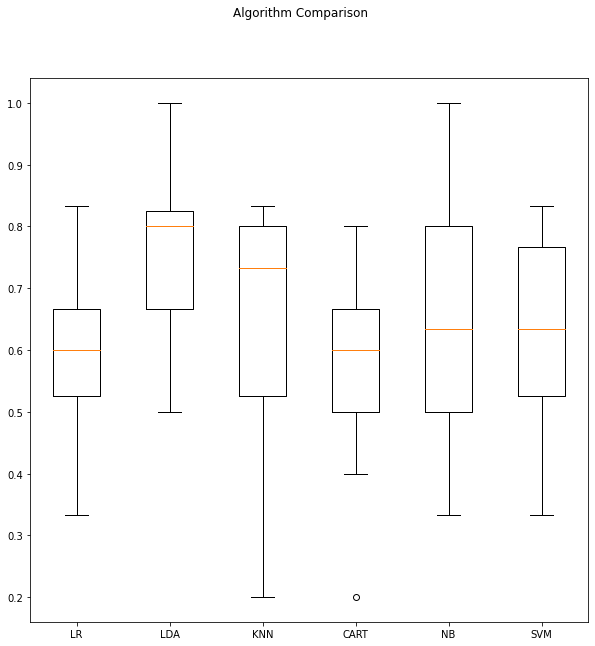

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=None)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.636667 (0.128625)
ScaledLDA: 0.766667 (0.153478)
ScaledKNN: 0.670000 (0.140989)
ScaledCART: 0.503333 (0.155242)
ScaledNB: 0.650000 (0.189883)
ScaledSVM: 0.713333 (0.186905)


In [ ]:
# LDA
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
shrinkage_values = [0.1,0.2,0.21,0.19,0.5,0.6,0.7,0.8,0.9,0.05,0.25,0.15,0.35,0.45,0.55,0.65,0.75, 0.85,0.95]
solver_values = ['svd', 'lsqr', 'eigen']
param_grid = dict(shrinkage=shrinkage_values, solver = solver_values)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.806667 using {'shrinkage': 0.1, 'solver': 'lsqr'}
nan (nan) with: {'shrinkage': 0.1, 'solver': 'svd'}
0.806667 (0.180616) with: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.806667 (0.180616) with: {'shrinkage': 0.1, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.2, 'solver': 'svd'}
0.806667 (0.180616) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.806667 (0.180616) with: {'shrinkage': 0.2, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.21, 'solver': 'svd'}
0.806667 (0.180616) with: {'shrinkage': 0.21, 'solver': 'lsqr'}
0.806667 (0.180616) with: {'shrinkage': 0.21, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.19, 'solver': 'svd'}
0.806667 (0.180616) with: {'shrinkage': 0.19, 'solver': 'lsqr'}
0.806667 (0.180616) with: {'shrinkage': 0.19, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.5, 'solver': 'svd'}
0.806667 (0.164520) with: {'shrinkage': 0.5, 'solver': 'lsqr'}
0.806667 (0.164520) with: {'shrinkage': 0.5, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.6, 'solve

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
190 fits failed out of a total of 570.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_

In [ ]:
# SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.840000 using {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.220000 (0.157903) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.220000 (0.157903) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.220000 (0.157903) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.220000 (0.157903) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.220000 (0.157903) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.336667 (0.175404) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.713333 (0.164114) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.516667 (0.135195) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.220000 (0.157903) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.220000 (0.157903) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.373333 (0.139682) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.750000 (0.169476) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.820000 (0.076303) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.533333 (0.142205) with: {'C': 10, 'gamma': 0.001, 'kern

## Ensembles

In [ ]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=None)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.446667 (0.192180)
GBM: 0.560000 (0.268245)
RF: 0.680000 (0.155063)
ET: 0.713333 (0.104563)


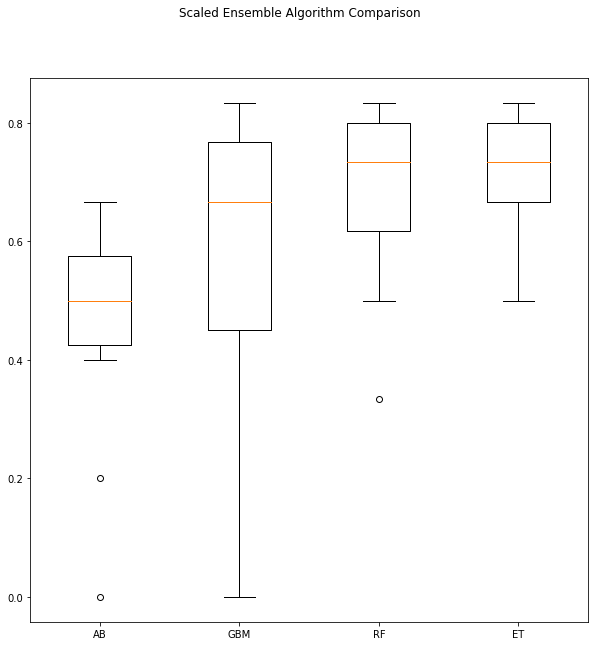

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50, 100, 150, 200, 250, 300, 350, 400, 500, 450, 360, 340]))
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.690000 using {'n_estimators': 50}
0.690000 (0.199472) with: {'n_estimators': 50}
0.673333 (0.146667) with: {'n_estimators': 100}
0.673333 (0.146667) with: {'n_estimators': 150}
0.690000 (0.135031) with: {'n_estimators': 200}
0.690000 (0.185023) with: {'n_estimators': 250}
0.690000 (0.185023) with: {'n_estimators': 300}
0.673333 (0.162481) with: {'n_estimators': 350}
0.640000 (0.191949) with: {'n_estimators': 400}
0.656667 (0.170652) with: {'n_estimators': 500}
0.640000 (0.191949) with: {'n_estimators': 450}
0.656667 (0.170652) with: {'n_estimators': 360}
0.656667 (0.170652) with: {'n_estimators': 340}


In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([35, 40, 45, 55, 60, 65, 50, 48, 49, 51, 52]))
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.613333 using {'n_estimators': 49}
0.563333 (0.120600) with: {'n_estimators': 35}
0.596667 (0.142556) with: {'n_estimators': 40}
0.596667 (0.142556) with: {'n_estimators': 45}
0.580000 (0.122202) with: {'n_estimators': 55}
0.596667 (0.121518) with: {'n_estimators': 60}
0.596667 (0.121518) with: {'n_estimators': 65}
0.563333 (0.120600) with: {'n_estimators': 50}
0.596667 (0.142556) with: {'n_estimators': 48}
0.613333 (0.140000) with: {'n_estimators': 49}
0.563333 (0.120600) with: {'n_estimators': 51}
0.563333 (0.120600) with: {'n_estimators': 52}


# Step 3: Training - Testing

## LDA

In [ ]:
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.1, solver='lsqr')
modelLDA.fit(X_train, Y_train)
predictions = modelLDA.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelLDA.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9818181818181818
0.9285714285714286
[[1 0 0 0]
 [0 3 0 0]
 [0 0 6 0]
 [0 0 1 3]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         3
         2.0       0.86      1.00      0.92         6
         3.0       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.96      0.94      0.95        14
weighted avg       0.94      0.93      0.93        14



## SVM

In [ ]:
modelSVM= SVC(C = 100, gamma = 0.001, kernel = 'rbf')
modelSVM.fit(X_train, Y_train)
predictions = modelSVM.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelSVM.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9818181818181818
0.7857142857142857
[[1 0 0 0]
 [0 2 1 0]
 [0 2 4 0]
 [0 0 0 4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       0.50      0.67      0.57         3
         2.0       0.80      0.67      0.73         6
         3.0       1.00      1.00      1.00         4

    accuracy                           0.79        14
   macro avg       0.82      0.83      0.82        14
weighted avg       0.81      0.79      0.79        14



## ET

In [ ]:
modelET= ExtraTreesClassifier(n_estimators= 50)
modelET.fit(X_train, Y_train)
predictions = modelET.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelET.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
0.6428571428571429
[[1 0 0 0 0]
 [0 2 1 0 0]
 [0 1 4 1 0]
 [0 0 1 2 1]
 [0 0 0 0 0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       0.67      0.67      0.67         3
         2.0       0.67      0.67      0.67         6
         3.0       0.67      0.50      0.57         4
         4.0       0.00      0.00      0.00         0

    accuracy                           0.64        14
   macro avg       0.60      0.57      0.58        14
weighted avg       0.69      0.64      0.66        14



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RF

In [ ]:
modelRF= RandomForestClassifier(n_estimators = 49)
modelRF.fit(X_train, Y_train)
predictions = modelRF.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelRF.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
0.5
[[1 0 0 0 0]
 [1 1 1 0 0]
 [0 0 4 2 0]
 [0 0 2 1 1]
 [0 0 0 0 0]]
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         1
         1.0       1.00      0.33      0.50         3
         2.0       0.57      0.67      0.62         6
         3.0       0.33      0.25      0.29         4
         4.0       0.00      0.00      0.00         0

    accuracy                           0.50        14
   macro avg       0.48      0.45      0.41        14
weighted avg       0.59      0.50      0.50        14



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Testing

## Prepare test dataset

In [ ]:
test = pd.read_excel('Love test.xlsx')
test.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,1.0.1,...,2.0.3,3.0.3,4.0.3,5.0.3,6.0.3,7.0.3,8.0.3,9.0.3,1.0.4,2.0.4
0,Đặng Thị Mai Hân,17/04/2004,Sinh viên năm 2,Nữ,Chưa xác định,Vừa hướng nội vừa hướng ngoại,Một chút,Một chút,Một chút,Một chút,...,1.0,1.0,1.0,1.0,2.0,2.0,0.0,3.0,1.0,12.0
1,Ngô Tuấn Khải,2003-09-12 00:00:00,Sinh viên năm 1,Nam,Không,Hướng nội,Một chút,Một chút,Một chút,Không,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,10.0
2,NaN,27/08/2002,Sinh viên năm 2,Nam,Không,Chưa xác định được,Có,Có,Có,Một chút,...,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,20.0
3,NaN,2002-07-05 00:00:00,Sinh viên năm 2,Nữ,Chưa xác định,Vừa hướng nội vừa hướng ngoại,Không,Một chút,Có,Một chút,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
4,Vũ,23/11/1998,Đã tốt nghiệp.,Nam,Không,Vừa hướng nội vừa hướng ngoại,Một chút,Một chút,Một chút,Không,...,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,13.0


In [ ]:
test.columns = ['Name', 'DoB', 'Job', 'Sex', 'LGBT', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 
                'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15',
                'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'Total']

In [ ]:
# Change values in total column to the rate of depression. Normal - Minimal - Mild - Medium - Severe.
test.Total = test.Total.replace({1: 0, 2: 0, 3: 0, 4: 0,
                                 5: 1, 6: 1, 7: 1, 8: 1, 9: 1,
                                 10: 2, 11: 2, 12: 2, 13: 2, 14: 2,
                                 15: 3, 16: 3, 17: 3, 18: 3, 19: 3,
                                 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4})

test.a4 = test.a4.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})

# Question (B)
test.b15 = test.b15.replace({'Chưa từng': 0, 'Một - hai lần': 1, 'Khoảng năm lần': 2, 'Khoảng 10 lần': 3, 'Rất nhiều': 4, 'Mỗi ngày': 5})

test = test.drop(columns=[ 'Name', 'DoB','a7', 'a8','a1','a2','a3','a4','a5','a6','LGBT','Sex',
                          'Job','b3','b4','b7','b8','b9','b10','b11','b13','b14','b15'])

In [ ]:
array = test.values
x = array[:,0:14]
y = array[:,14]

## Test dataset

### LDA

In [ ]:
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.1, solver='lsqr')
modelLDA.fit(X_train, Y_train)
predictions = modelLDA.predict(x)

In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.8695652173913043
[[2 0 0 0 0]
 [0 6 0 0 0]
 [0 2 6 0 0]
 [0 0 0 1 0]
 [0 0 0 1 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       0.75      1.00      0.86         6
         2.0       1.00      0.75      0.86         8
         3.0       0.50      1.00      0.67         1
         4.0       1.00      0.83      0.91         6

    accuracy                           0.87        23
   macro avg       0.85      0.92      0.86        23
weighted avg       0.91      0.87      0.87        23



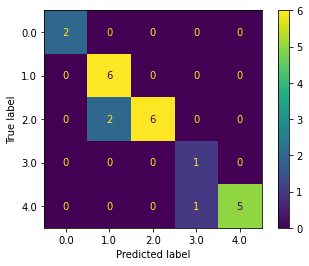

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

cm = confusion_matrix(y, predictions, labels=modelLDA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelLDA.classes_)
t=disp.plot()
plt.show()

### SVM

In [ ]:
modelSVM= SVC(C = 100, gamma = 0.001, kernel = 'rbf')
modelSVM.fit(X_train, Y_train)
predictions = modelSVM.predict(x)

In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.8260869565217391
[[2 0 0 0 0]
 [0 6 0 0 0]
 [0 1 7 0 0]
 [0 0 0 1 0]
 [0 0 0 3 3]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       0.86      1.00      0.92         6
         2.0       1.00      0.88      0.93         8
         3.0       0.25      1.00      0.40         1
         4.0       1.00      0.50      0.67         6

    accuracy                           0.83        23
   macro avg       0.82      0.88      0.78        23
weighted avg       0.93      0.83      0.84        23



### ET

In [ ]:
modelET= ExtraTreesClassifier(n_estimators= 50)
modelET.fit(X_train, Y_train)
predictions = modelET.predict(x)

In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

### RF

In [ ]:
modelRF= RandomForestClassifier(n_estimators = 49)
modelRF.fit(x,y)
predictions = modelRF.predict(x)

In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))